# Support Vector Machine Implementation

### Import required libraries

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Load the dataset

In [193]:
seed_data = pd.read_csv("seeds_dataset.csv")

In [194]:
seed_data.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,LABEL
0,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,Canadian
1,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,Canadian
2,10.59,12.41,0.8648,4.899,2.787,4.975,4.794,Canadian
3,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,Canadian
4,12.11,13.27,0.8639,5.236,2.975,4.132,5.012,Canadian


In [195]:
seed_data.shape

(90, 8)

In [196]:
seed_data.dtypes

area             float64
perimeter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
groove_length    float64
LABEL             object
dtype: object

In [197]:
seed_data.isnull().sum()

area             0
perimeter        0
compactness      0
length           0
width            0
asymmetry        0
groove_length    0
LABEL            0
dtype: int64

In [198]:
seed_data.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,14.922333,14.585556,0.871433,5.636878,3.268422,3.659169,5.409122
std,3.022909,1.332049,0.026874,0.437506,0.399180,1.506971,0.475133
min,10.590000,12.410000,0.808200,4.899000,2.630000,0.765100,4.605000
25%,12.207500,13.452500,0.856475,5.285250,2.909500,2.317750,5.069250
50%,14.610000,14.360000,0.877100,5.555500,3.263000,3.390000,5.226000
75%,17.045000,15.602500,0.890300,5.925250,3.561750,4.833000,5.826500
max,21.180000,17.250000,0.918300,6.579000,4.033000,8.315000,6.451000


In [199]:
seed_data["LABEL"].value_counts()

LABEL
Canadian    30
Kama        30
Rosa        30
Name: count, dtype: int64

The dataset is clean with no missing and null values

### Endocing the label

In [200]:
le = LabelEncoder()
seed_data["LABEL"] = le.fit_transform(seed_data["LABEL"])


### Spliting the label and features

In [201]:
X = seed_data.drop("LABEL", axis=1)
y = seed_data["LABEL"]

### Train Test spliting

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Formatted test and train data 

In [203]:
print("Formatted Training Data:")
print(pd.DataFrame(X_train).head())

print("Training Labels:")
print(y_train[:6])

print("Formatted Testing Data:")
print(pd.DataFrame(X_test).head())

print("Testing Labels:")
print(y_test[:6])


Formatted Training Data:
     area  perimeter  compactness  length  width  asymmetry  groove_length
9   12.26      13.60       0.8333   5.408  2.833      4.756          5.360
15  11.02      13.00       0.8189   5.325  2.701      6.735          5.163
76  20.16      17.03       0.8735   6.513  3.773      1.910          6.185
22  12.19      13.36       0.8579   5.240  2.909      4.857          5.158
49  14.99      14.56       0.8883   5.570  3.377      2.958          5.175
Training Labels:
9     0
15    0
76    2
22    0
49    1
3     0
Name: LABEL, dtype: int64
Formatted Testing Data:
     area  perimeter  compactness  length  width  asymmetry  groove_length
71  17.12      15.55       0.8892   5.850  3.566      2.858          5.746
10  11.55      13.10       0.8455   5.167  2.845      6.715          4.956
44  12.36      13.19       0.8923   5.076  3.042      3.220          4.605
39  13.89      14.02       0.8880   5.439  3.199      3.986          4.738
74  15.38      14.90       0.8706  

### Polynomial SVM

In [204]:
polynomial_svm = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
polynomial_svm.fit(X_train, y_train)
y_pred_polynomial = polynomial_svm.predict(X_test)

In [205]:
print("Accuracy:", polynomial_svm.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_polynomial))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.83      0.83      0.83         6
           2       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



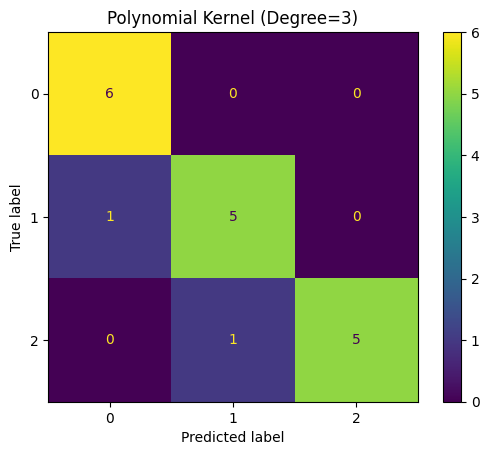

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_polynomial, cmap='viridis')
plt.title("Polynomial Kernel (Degree=3)")
plt.show()

### RBF SVM

In [207]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

In [208]:
print("Accuracy:", svm_rbf.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.83      0.83      0.83         6
           2       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



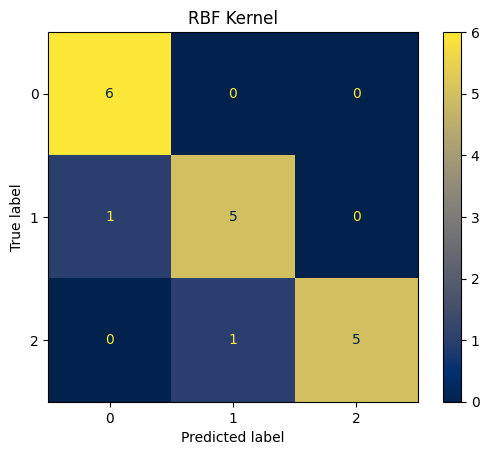

In [209]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf, cmap='cividis')
plt.title("RBF Kernel")
plt.show()

### Linear SVM

In [210]:
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [211]:
print("Accuracy:", svm_linear.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.83      0.83      0.83         6
           2       1.00      0.83      0.91         6

    accuracy                           0.89        18
   macro avg       0.90      0.89      0.89        18
weighted avg       0.90      0.89      0.89        18



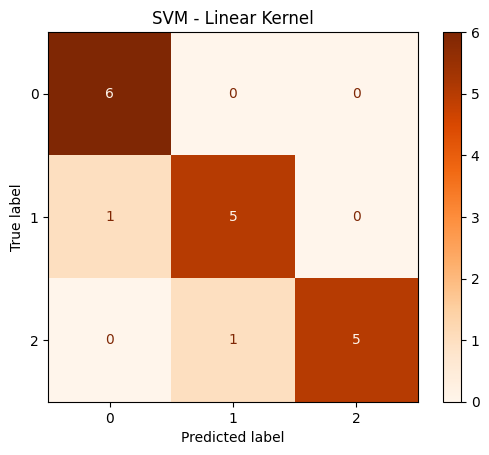

In [212]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_linear, cmap='Oranges')
plt.title("SVM - Linear Kernel")
plt.show()

All three Support Vector Machine (SVM) models — Polynomial (degree 3), RBF, and Linear — achieved the same accuracy of 88.89% on the test set. Each model correctly classified 16 out of 18 samples, misclassifying one sample from class 1 and one from class 2. The confusion matrices were identical, showing the same distribution of correct and incorrect predictions across classes.
This consistent performance across different kernels suggests that the dataset is well-structured and nearly linearly separable, allowing even the simpler linear kernel to perform as well as the more complex polynomial and RBF kernels. The classification reports also confirm this, with nearly perfect precision and recall for class 0, and balanced scores for the other two classes.
In conclusion, no single SVM model outperformed the others in this case. All three kernels were effective and produced identical results on the test data. This highlights that for clean and balanced datasets like the seeds dataset, simpler kernels like linear SVM may be just as effective as more complex ones.
